In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data_path = "D:\College\sem 6\chsw\Major Project\weather_forecast_data.csv"
df = pd.read_csv(data_path)

# Display dataset info
print(df.info())

# Assuming 'rain' is the target column
target_column = "Rain"
if 'Rain' in df.columns:
    df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,103237.87590,1
1,27.879734,46.489704,5.952484,4.990053,99261.41895,0
2,25.069084,83.072843,1.371992,14.855784,100723.16200,0
3,23.622080,74.367758,7.050551,67.255282,98263.20127,1
4,20.591370,96.858822,4.643921,47.676444,98082.51417,0


In [2]:
X = df.drop(columns=[target_column])
y = df[target_column]

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
 Rain
1    2186
0    2186
Name: count, dtype: int64


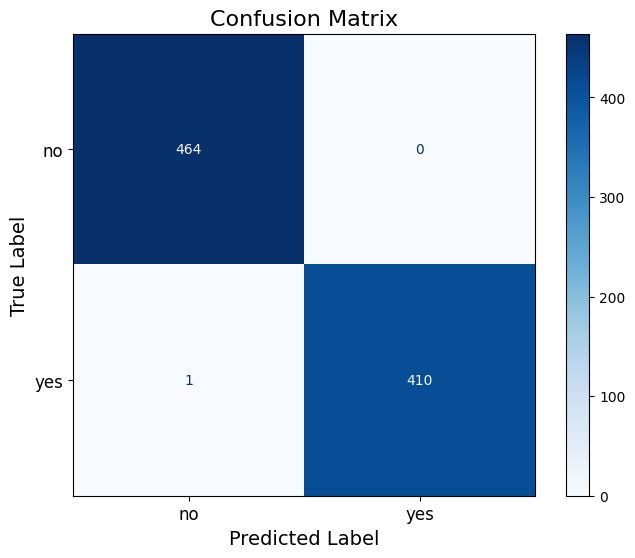

Model Accuracy: 0.9989
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       464
           1       1.00      1.00      1.00       411

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no", "yes"])
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size as needed
disp.plot(ax=ax, cmap="Blues", values_format='d')  # 'd' = integer format
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

In [4]:
custom_input = {
    "Temperature": 23.72, 
    "Humidity": 89.6, 
    "Wind_Speed": 7.33, 
    "Cloud_Cover": 50.5,
    "Pressure": 1032.379
}
custom_df = pd.DataFrame([custom_input])
print("X_train columns:", list(X_train.columns))
print("Custom input columns:", list(custom_df.columns))

# Ensure column order matches training data
custom_df = custom_df.reindex(columns=X_train.columns, fill_value=0)
predicted_rain = model.predict(custom_df)
print("Predicted Rain:", predicted_rain[0])  # 0 or 1 (No Rain or Rain)



X_train columns: ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
Custom input columns: ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
Predicted Rain: 1


In [5]:
import joblib

# Save the trained model
model_filename = "xgboost_rainfall_model.sav"
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as xgboost_rainfall_model.sav
